<a href="https://colab.research.google.com/github/SHAIKYASIR/Car-Classification/blob/main/CAR%20CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!git clone https://github.com/SHAIKYASIR/Car-Classification.git

Cloning into 'Car-Classification'...
remote: Enumerating objects: 3486, done.
remote: Counting objects: 100% (3486/3486), done.
remote: Compressing objects: 100% (3483/3483), done.
remote: Total 3486 (delta 0), reused 3486 (delta 0), pack-reused 0
Receiving objects: 100% (3486/3486), 29.76 MiB | 11.60 MiB/s, done.


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.15.0'

In [5]:
import pandas as pd

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/Car-Classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 1589 images belonging to 2 classes.


In [40]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Car-Classification/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 389 images belonging to 2 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [20]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
# Iterate through the dataset and check shapes
for images, labels in training_set:
    print("Image batch shape:", images.shape)  # Expected shape: (batch_size, img_height, img_width, num_channels)
    print("Label batch shape:", labels.shape)  # Expected shape: (batch_size, num_classes)
    break  # Stop after one batch


Image batch shape: (32, 64, 64, 3)
Label batch shape: (32,)


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/Car-Classification/train',
    target_size=(128, 128),  # Image size
    batch_size=32,
    class_mode='categorical',  # For one-hot encoded labels
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/Car-Classification/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1272 images belonging to 2 classes.
Found 317 images belonging to 2 classes.


In [46]:
# Check data type of images and labels
for images, labels in train_generator:
    print("Data type of images:", images.dtype)  # Should typically be float32
    print("Data type of labels:", labels.dtype)  # Should typically be float32 (one-hot encoded) or int32 (sparse labels)
    break


Data type of images: float32
Data type of labels: float32


In [45]:
# Check image shape and type
for images, labels in train_generator:
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Image dtype:", images.dtype)
    print("Label dtype:", labels.dtype)
    break

# Model input shape
print("Model input shape:", model.input_shape)

# Steps per epoch and validation steps
print("Steps per epoch:", train_generator.samples // train_generator.batch_size)
print("Validation steps:", validation_generator.samples // validation_generator.batch_size)


Image batch shape: (32, 128, 128, 3)
Label batch shape: (32, 2)
Image dtype: float32
Label dtype: float32
Model input shape: (None, 128, 128, 3)
Steps per epoch: 39
Validation steps: 9


In [34]:
model.add(layers.Dense(7, activation='softmax'))


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/Car-Classification/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 1589 images belonging to 2 classes.


In [49]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [50]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi', 'Toyota Innova']

In [51]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/Car-Classification/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 389 images belonging to 2 classes.


In [52]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [56]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_8 (Dense)             (None, 96)               

In [58]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [60]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=3
)

Epoch 1/3
50/50 [==============================] - 9s 177ms/step - loss: 0.5628 - accuracy: 0.7218 - val_loss: 0.4787 - val_accuracy: 0.7712
Epoch 2/3
50/50 [==============================] - 9s 187ms/step - loss: 0.4683 - accuracy: 0.7930 - val_loss: 0.4234 - val_accuracy: 0.7969
Epoch 3/3
50/50 [==============================] - 9s 190ms/step - loss: 0.3934 - accuracy: 0.8345 - val_loss: 0.3572 - val_accuracy: 0.8432


In [61]:
scores = model.evaluate(test_generator)

13/13 [==============================] - 2s 126ms/step - loss: 0.3572 - accuracy: 0.8329


In [62]:
scores

[0.3571854531764984, 0.8329048752784729]

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [66]:
import numpy as np # linear algebra
import pandas as pd

1/1 [==============================] - 0s 20ms/step


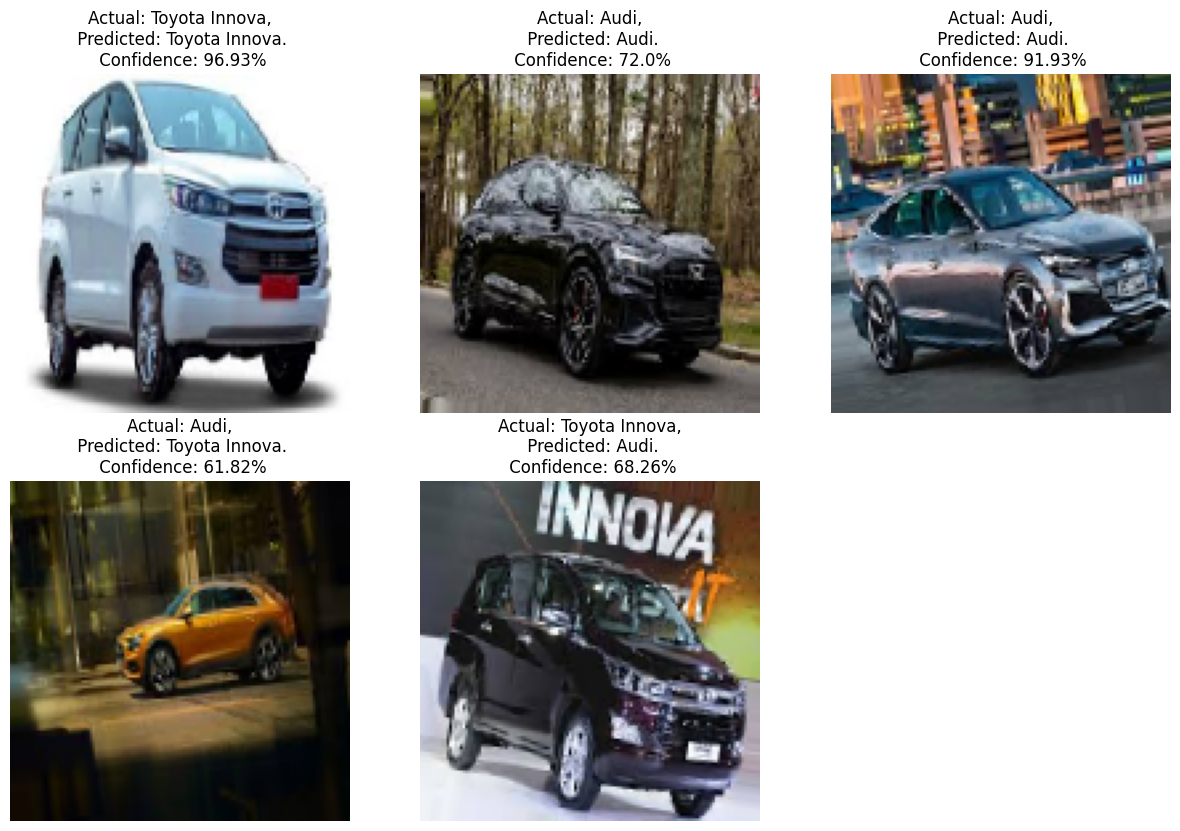

In [70]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [71]:
import numpy as np
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('/content/Car-Classification/test/Audi/1000.jpg',
                            target_size = (64, 64))
#test_image = tf.keras.utils.load_img(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0].any() == 1:
    prediction = 'Audi'
else:
    prediction = 'Toyota Innova'


1/1 [==============================] - 0s 20ms/step


In [72]:
print(prediction)

Audi
